## Title and Executive Summary
### Analysis and Visualization of Facebook Metrics

In this project, I use the Facebook Metrics dataset from the University of California, Irvine to perform some types of analysis that would be expected to ascertain the performance of social media posts in a real-world setting. Through data analysis and visualization, I hope to answer the following research questions:

- Do the number of likes of a post and the number of shares of a post follow a standard distribution?

- In which month, day of the week, and hour of the day are the most (and the fewest) posts made?

- Is there a linear correlation between the the lifetime total reach of a post and its number of likes?

- Might a simple linear regression model predict the number of likes of a post based on that post's lifetime total reach.

- Might a multiple linear regression model be effective in predicting the Total Interactions of a post?

## Data Card

Source of dataset:
- Moro, Sérgio, Paulo Rita, and Bernardo Vala. 2016. *Facebook Metrics.* UCI Machine Learning Repository. https://doi.org/10.24432/C5QK55.
    - https://archive.ics.uci.edu/dataset/368/facebook+metrics

Fields:
- Page total likes, Integer
- Type, Categorical
- Category, Integer
- Post Month, Integer
- Post Weekday, Integer
- Post Hour, Integer
- Paid, Continuous
- Lifetime Post Total Reach, Integer
- Lifetime Post Total Impressions, Integer
- Lifetime Engaged Users, Integer
- Lifetime Post Consumers, Integer
- Lifetime Post Consumptions, Integer
- Lifetime Post Impressions by people who have liked your Page, Integer
- Lifetime Post reach by people who like your Page, Integer
- Lifetime People who have liked your Page and engaged with your post, Integer
- comment, Integer
- like, Integer
- share, Integer
- Total Interactions, Integer (This is indicated as the target feature in the documentation.)

License:
- This dataset is licensed under a Creative Commons Attribution 4.0 International (CC BY 4.0) license.
    - This allows for the sharing and adaptation of the datasets for any purpose, provided that the appropriate credit is given.

NOTE: See full requested citation in the Appendix.

## Loading and File IO

Below, I begin by importing all the libraries necessary for the entire notebook. I then implement the load_csv() template provided by Professor Y. Gilany in the instructions to the assignment to read my dataset csv file into a pandas dataframe labeled df_raw.

In [4]:
# Here I import the necessary libraries.

# For file path handling
from pathlib import Path

# For data manipulation and statistical analysis
import numpy as np
import pandas as pd

# For the visualizations
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import plotly.express as px
import calendar

# For the linear regression model
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


def load_csv(path: Path) -> pd.DataFrame:
  """This function, provided as a template, uses a try-except block to catch IO exceptions,
  while attempting to load a CSV file into a pandas DataFrame."""
  try:
    df = pd.read_csv('data/dataset_Facebook.csv', sep=';')
  except FileNotFoundError as e:
    raise FileNotFoundError(
        f"Could not find {path.name}. check data/ folder and filename.") from e
  except pd.errors.ParserError as e:
    raise ValueError(
        f"Parsing failed for {path.name}. check delimiter or bad rows.") from e
  else:
    return df


# Here I call the function to load the CSV file.
df_raw = load_csv(Path('data/dataset_Facebook.csv'))

### Default Style Formatting for Visualizations

Coming from a web design background, I am accustomed to formatting styles consistently using CSS in a separate stylesheet. So, I was very happy to see the below code in the Visulization.ipynb notebook in the EDA and Visualization module of the course. This code is originally written by Professor Y. Gilany. I only adjusted some values.

In [5]:
# =============================================================================
# 🎨 VISUALIZATION STYLE SETUP
# =============================================================================
# Setting up consistent styling for all our charts
# This ensures all visualizations have a professional, cohesive look
# Set default matplotlib parameters
plt.rcParams.update({
    'figure.figsize': (10, 6),
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 16,
    'axes.titleweight': 'bold',
    'axes.labelweight': 'normal',
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'legend.fontsize': 12,
    'figure.titlesize': 18,
    'figure.dpi': 100,
    'savefig.dpi': 300,
    'savefig.bbox': 'tight',
    'patch.linewidth': 0.5,
    'patch.edgecolor': 'white',
    'grid.linewidth': 0.8,
    'grid.alpha': 0.3
})
# Set the overall style
sns.set_style('whitegrid', {
    'grid.linestyle': '--',
    'grid.alpha': 0.3,
    'axes.edgecolor': '.2',
    'axes.linewidth': 1.2
})
sns.set_context('notebook', font_scale=1.1)
# Define a clean, modern color palette
sns.set_palette("pastel")

## Preliminary Exploratory Data Analysis (EDA)

First, I use the .info, .head, and .describe methods to look at basic information about the dataset.

From .info, I learned that the data is not comma separated, but instead separated by a semicolon. So, I rewrote the arguments of the .read_csv method to denote the semicolon separator.

From .head, I see a few discrepancies with data types that may indicate that I should change some of the data types and/or transform some of the data: 
- like and share are stored as floats, but seem to actually be integers
- paid may be a binary/boolean variable, but is stored as a float
- Post month, weekday, and hour variables are sort of date/time variables, but stored as integers
- Type is a categorical variable stored as a string

The basic statistical information provided by .describe is not particularly useful for the categorical variables (nor many of the integer variables), but does help me to see the ranges of values for the numeric columns.

In [6]:
# To check the data types and non-null counts of each column
df_raw.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

In [7]:
# To view the first 15 rows of the data, check value formats
df_raw.head(15)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393
5,139441,Status,2,12,1,9,0.0,10472,20849,1191,1073,1389,16034,7852,1016,1,152.0,33.0,186
6,139441,Photo,3,12,1,3,1.0,11692,19479,481,265,364,15432,9328,379,3,249.0,27.0,279
7,139441,Photo,3,12,7,9,1.0,13720,24137,537,232,305,19728,11056,422,0,325.0,14.0,339
8,139441,Status,2,12,7,3,0.0,11844,22538,1530,1407,1692,15220,7912,1250,0,161.0,31.0,192
9,139441,Photo,3,12,6,10,0.0,4694,8668,280,183,250,4309,2324,199,3,113.0,26.0,142


In [8]:
# To get summary statistics of numerical columns
df_raw.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,5.000000e+02,500.000000,500.000000,500.000000,5.000000e+02,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,1.880000,7.038000,4.150000,7.840000,0.278557,13903.36000,2.958595e+04,920.344000,798.772000,1415.130000,1.676638e+04,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,0.852675,3.307936,2.030701,4.368589,0.448739,22740.78789,7.680325e+04,985.016636,882.505013,2000.594118,5.979102e+04,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.00000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5.694750e+03,393.750000,332.500000,509.250000,3.969750e+03,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9.051000e+03,625.500000,551.500000,851.000000,6.255500e+03,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,2.208550e+04,1062.000000,955.500000,1463.000000,1.486050e+04,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


## Preparation and Feature Engineering

Below, I first copy the raw data into a new dataframe before beginning any cleaning or manipulation of the data. This way, I have the original data, untouched, if I need to revert to it at any point.

From my preliminary EDA above, I learned that a handful of records have null values for one or more columns, so I dropped those records to clean the data. This resulted in 495 total records.

The "Type" column is a categorical feature, indicating whether the individual post is a photo, a status update, a video, or a link. I used one-hot encoding, built into sci-kit learn, to create separate binary features for each of the possible values of Type. This will be useful for my linear regression later. For some of the statistical analysis before that I will need to use the original Type column data.

Before moving on to the analysis and visualization, I ended this cell by calling the .info() method on the new cleaned, encoded dataset, so that I could verify that the records with null values were dropped, the new encoded columns were created, and that everything was concatenated properly. 

In [9]:
# Here I copy the raw data so I don't touch the original data
df = df_raw.copy()

# To drop records with null values
df = df.dropna()

# One-hot encoding for the 'Type' categorical feature
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(df[['Type']])

# To create a DataFrame for the encoded columns
encoded_cols = pd.DataFrame(
    encoded_features, columns=encoder.get_feature_names_out(['Type']))

# To align the index of the encoded columns with the original DataFrame
encoded_cols.index = df.index

# To drop the original 'Type' column and concatenate the encoded columns
df_dropped = df.drop(columns='Type', axis=1)
df_encoded = pd.concat([df_dropped, encoded_cols
                        ], axis=1)

# To check that the columns have been concatenated correctly and make sure records with null values were dropped
df_encoded.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 495 entries, 0 to 498
Data columns (total 22 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     495 non-null    int64  
 1   Category                                                             495 non-null    int64  
 2   Post Month                                                           495 non-null    int64  
 3   Post Weekday                                                         495 non-null    int64  
 4   Post Hour                                                            495 non-null    int64  
 5   Paid                                                                 495 non-null    float64
 6   Lifetime Post Total Reach                                            495 non-null    int64  
 7   Lifetime Post

## Analysis and Visualization

First, I look at the distribution of data in the Total Interactions column. 

In order to create a box plot, I needed to first calculate some basic statistical information on the dataset, but more than the .describe() method could automatically provide.

In [13]:
# This code is for basic statistical analysis of the 'Total Interactions' column.
# First, I caluclate measures of center.
mean = df_encoded['Total Interactions'].mean()
median = df_encoded['Total Interactions'].median()
# Then I calculate spread based on standard deviation, quartiles, and interquartile range.
std = df_encoded['Total Interactions'].std()
q1 = df_encoded['Total Interactions'].quantile(0.25)
q3 = df_encoded['Total Interactions'].quantile(0.75)
iqr = q3 - q1
# Then I calculate skewness.
skewness = ((df_encoded['Total Interactions'] - mean) ** 3).mean() / (std ** 3)

# I determine outliers using Tukey's rule to define upper and lower boundaries,
# then identifying the points that fall outside the boundaries.
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df_encoded[(df_encoded['Total Interactions'] < lower_bound) |
                      (df_encoded['Total Interactions'] > upper_bound)]

# Here I print the summary information.
print('Mean: ' + str(mean))
print('Median: ' + str(median))
print('Standard Deviation: ' + str(std))
print(f'Quartiles: Q1: {q1}, Q3: {q3}')
print('Interquartile Range: ' + str(iqr))
print('Skewness: ' + str(skewness))
print('Tukey Lower Bound: ' + str(lower_bound))
print('Tukey Upper Bound: ' + str(upper_bound))
print('Number of Outliers: ' + str(len(outliers)))

Mean: 213.96767676767678
Median: 125.0
Standard Deviation: 381.6774489886114
Quartiles: Q1: 72.0, Q3: 231.0
Interquartile Range: 159.0
Skewness: 9.628733781705204
Tukey Lower Bound: -166.5
Tukey Upper Bound: 469.5
Number of Outliers: 40


## Distribution of Total Interactions

I visualize this distribution, first in a histogram with a KDE line superimposed. I used Seaborn for this instead of matplotlib because Seaborn allows you to easily show the KDE line in a histogram.

(0.0, 2200.0)

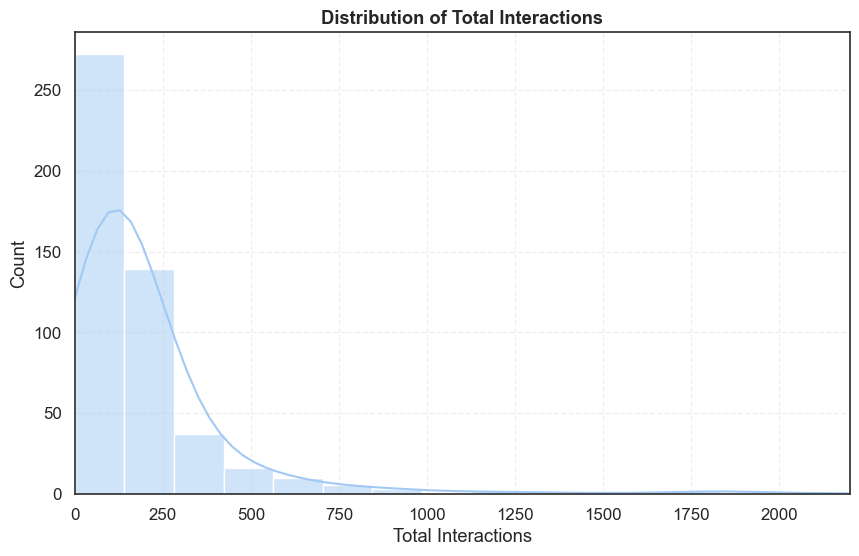

In [ ]:
# Here, I use seaborn to create a histogram with a KDE line
# to show the distribution of Total Interactions.

plt.figure()
sns.histplot(x=df_encoded['Total Interactions'], kde=True)
plt.title('Distribution of Total Interactions')
plt.xlim(0, 2200)

Second, I generate a box plot to show not just the distribution, but the interquartile range, the "whiskers," and outliers. I added annotations to it to identify these measures. This plot is very tall, but because of the range of outliers and more condensed spread, I wanted this imformation to be legible.  

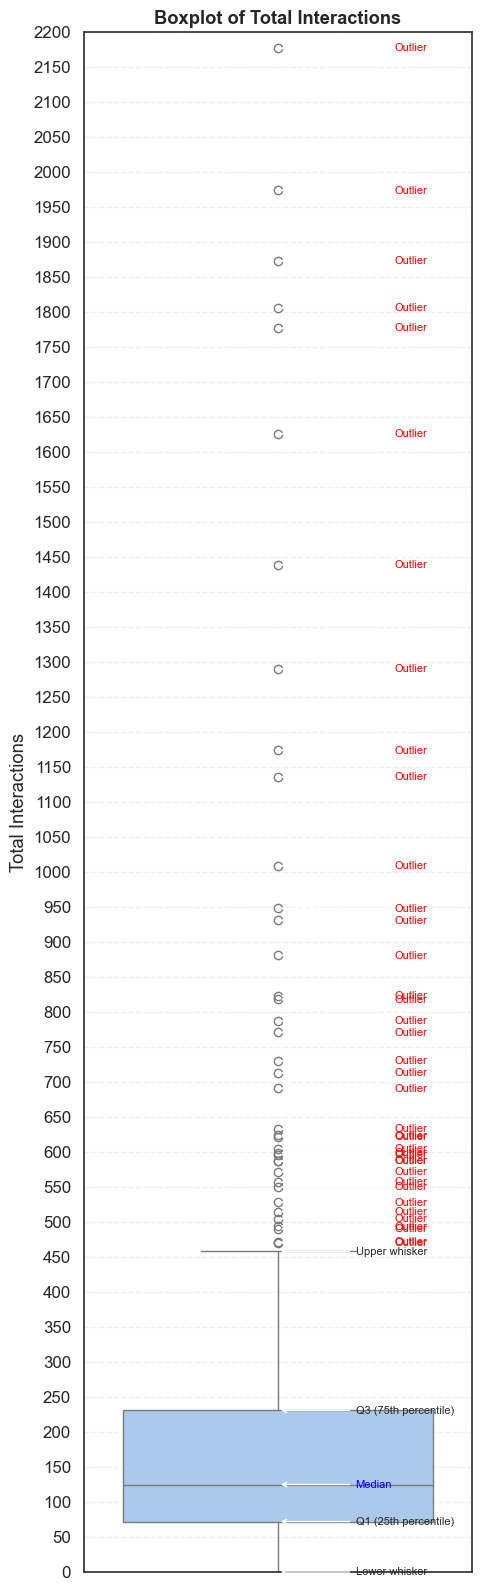

In [15]:
# Here, I use seaborn to create a boxplot to show the distribution of Total Interactions,
# along with annotations for median, quartiles, whiskers, and outliers.

plt.figure(figsize=(5, 20))
sns.boxplot(y=df_encoded['Total Interactions'])
plt.title('Boxplot of Total Interactions')
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(50))
plt.ylim(0, 2200)

# Annotate median, quartiles, whiskers
lower_whisker = df['Total Interactions'][df['Total Interactions']
                                         >= lower_bound].min()
upper_whisker = df['Total Interactions'][df['Total Interactions']
                                         <= upper_bound].max()

# Median
plt.annotate('Median', xy=(0, median), xytext=(0.2, median),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             va='center', fontsize=8, color='blue')

# Q1
plt.annotate('Q1 (25th percentile)', xy=(0, q1), xytext=(0.2, q1),
             arrowprops=dict(facecolor='gray', arrowstyle='->'),
             va='center', fontsize=8)

# Q3
plt.annotate('Q3 (75th percentile)', xy=(0, q3), xytext=(0.2, q3),
             arrowprops=dict(facecolor='gray', arrowstyle='->'),
             va='center', fontsize=8)

# Lower whisker
plt.annotate('Lower whisker', xy=(0, lower_whisker), xytext=(0.2, lower_whisker),
             arrowprops=dict(facecolor='green', arrowstyle='->'),
             va='center', fontsize=8)

# Upper whisker
plt.annotate('Upper whisker', xy=(0, upper_whisker), xytext=(0.2, upper_whisker),
             arrowprops=dict(facecolor='green', arrowstyle='->'),
             va='center', fontsize=8)

# Outliers
for outlier in outliers['Total Interactions']:
  plt.annotate('Outlier', xy=(0, outlier), xytext=(0.3, outlier),
               arrowprops=dict(facecolor='red', arrowstyle='->'),
               va='center', fontsize=8, color='red')

plt.show()

### AI Disclosure
For the requirements under E) Statistical Analysis, I was familiar with only a couple of the concepts (independent t test and chi square, for example) discussed in Data Tech Essentials this semester. However, we did not learn to calculate them in Python in that course, but instead using R in R Studio. So, I sought help from the DTS Code Interpreter agent in the Bearcat GPT pilot app. This allowed me to learn about performing these operations in Python using functions from the scipy.stats library while also beta-testing the new agent.

I ended up not using the the scipy.stats library here because I could not explain the code. Using numpy, pandas, and seaborn resulted in longer code, but I could see the steps layed out a little more clearly. Still, the code for the first three analyses/visualizations (up to and including the Pearson correlation visualization) relies heavily on use of AI and so I understand if I cannot receive credit for them. I was also not very familiar with seaborn, so adjusting the code to fit my data has been helpful in learning more.

## Group Comparison of Paid versus Non-Paid Posts

Before visualizing it, I first perform Welch's t-test to compare the means of Total Interactions between Paid and Non-Paid posts, along with calculating effect size (Cohen's d) and a 95% confidence interval for the difference in means.

In [ ]:
# First, I separate the data into two groups: Paid and Non-Paid posts.
paid = df_encoded[df_encoded['Paid'] == 1]['Total Interactions'].dropna()
nonpaid = df_encoded[df_encoded['Paid'] == 0]['Total Interactions'].dropna()

# Then, I count the number of each group and calculate means and variances for each.
n_paid = len(paid)
n_nonpaid = len(nonpaid)
mean_paid = paid.mean()
mean_nonpaid = nonpaid.mean()
var_paid = paid.var(ddof=1)
var_nonpaid = nonpaid.var(ddof=1)

# This code performs Welch's t-test calculation and degrees of freedom
# calculation for the two groups.
t_num = mean_paid - mean_nonpaid
t_den = np.sqrt(var_paid / n_paid + var_nonpaid / n_nonpaid)
t_stat = t_num / t_den
df_num = (var_paid/n_paid + var_nonpaid/n_nonpaid)**2
df_den = ((var_paid/n_paid)**2)/(n_paid-1) + \
    ((var_nonpaid/n_nonpaid)**2)/(n_nonpaid-1)
df_welch = df_num / df_den

# This code calculates the effect size, the practical significance, using Cohen's d.
pooled_std = np.sqrt(((n_paid-1)*var_paid + (n_nonpaid-1)
                     * var_nonpaid) / (n_paid + n_nonpaid - 2))
cohens_d = (mean_paid - mean_nonpaid) / pooled_std

# 95% CI for difference in means
t_crit = 1.96  # normal approx for large samples
diff_mean = mean_paid - mean_nonpaid
ci_low = diff_mean - t_crit * t_den
ci_high = diff_mean + t_crit * t_den

print(f"Welch's t-stat: {t_stat:.2f}, df={df_welch:.1f}")
print(f"Effect size (Cohen's d): {cohens_d:.2f}")
print(f"95% CI for difference in means: ({ci_low:.2f}, {ci_high:.2f})")

Welch's t-stat: 1.71, df=157.7
Effect size (Cohen's d): 0.24
95% CI for difference in means: (-12.81, 191.52)


## Proportion of paid vs. non-paid posts by type

Although I created new binary features for each of the types of post, for the Chi-square test and visualization of the proportion of paid vs. non-paid posts, I used the original Type column.

Chi-square: 3.71, dof=3


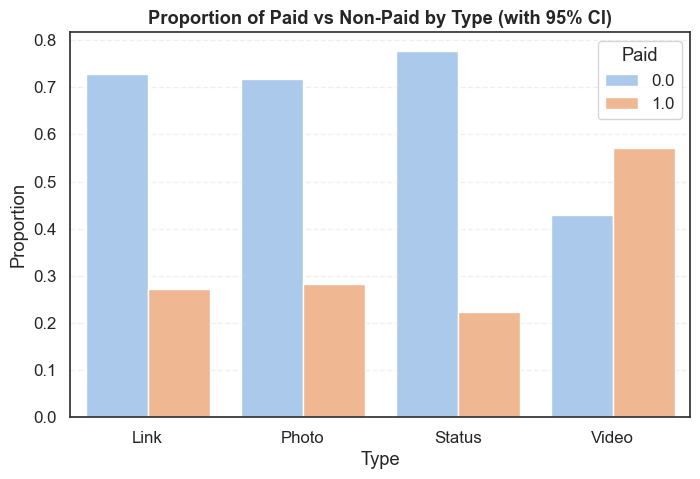

In [19]:
# First, I create a contingency table for the Chi-square test
contingency = pd.crosstab(df['Type'], df['Paid'])

# This code performs the Chi-square test
observed = contingency.values
expected = np.outer(observed.sum(axis=1),
                    observed.sum(axis=0)) / observed.sum()
chi2 = ((observed - expected)**2 / expected).sum()

# This code determines the degrees of freedom and prints them along with the Chi-square statistic
dof = (observed.shape[0] - 1) * (observed.shape[1] - 1)
print(f"Chi-square: {chi2:.2f}, dof={dof}")

# This code generates a proportion plot with a 95% confidence interval
prop_df = df.groupby(['Type', 'Paid']).size().reset_index(name='count')
total_per_type = prop_df.groupby('Type')['count'].transform('sum')
prop_df['proportion'] = prop_df['count'] / total_per_type

plt.figure(figsize=(8, 5))
sns.barplot(data=prop_df, x='Type', y='proportion',
            hue='Paid', errorbar=('ci', 95))
plt.title('Proportion of Paid vs Non-Paid by Type (with 95% CI)')
plt.ylabel('Proportion')
plt.show()

## Correlation Between Total Page Likes and Lifetime Total Reach

To determine the strength and direction of correlation between these two variables, I calculated the Pearson correlation using numpy's built-in .correcoef() function and a 95% confidence interval. I then plotted the two variables on a scatter plot, showing the regression line.

Pearson r: -0.08, 95% CI: (-0.17, 0.01)


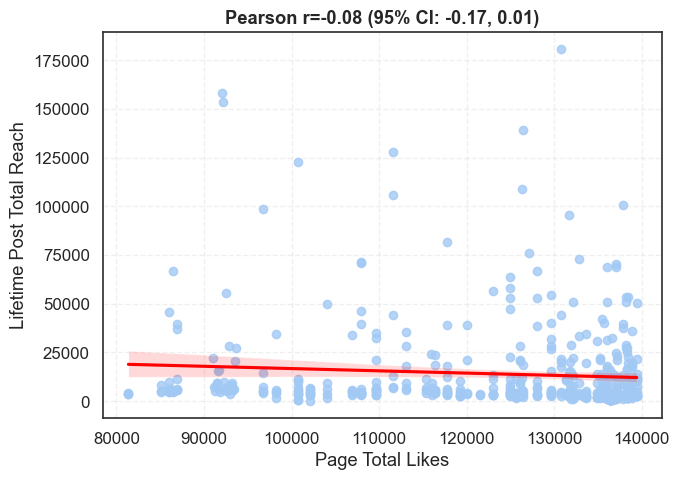

In [32]:
x = df_encoded['Page total likes'].dropna()
y = df_encoded['Lifetime Post Total Reach'].dropna()
common_index = x.index.intersection(y.index)
x = x.loc[common_index]
y = y.loc[common_index]

# Pearson correlation
r = np.corrcoef(x, y)[0, 1]

# 95% CI using Fisher transformation
n = len(x)
z = np.arctanh(r)
se = 1/np.sqrt(n-3)
z_crit = 1.96
ci_low = np.tanh(z - z_crit*se)
ci_high = np.tanh(z + z_crit*se)

print(f"Pearson r: {r:.2f}, 95% CI: ({ci_low:.2f}, {ci_high:.2f})")

# Plot
plt.figure(figsize=(7, 5))
sns.regplot(x=x, y=y, ci=95, line_kws={'color': 'red'})
plt.title(f'Pearson r={r:.2f} (95% CI: {ci_low:.2f}, {ci_high:.2f})')
plt.xlabel('Page Total Likes')
plt.ylabel('Lifetime Post Total Reach')
plt.tight_layout()
plt.show()

## Time Series Distributions of the Frequency of Posts

The data was not truly organized into a time series, where datapoints are organized by chronological date. However, the month of a post, its day of the week, and the hour of the day it was posted are all features. So, I was able to create distributions for each of these features, which I generated as three subplots of a single figure, just to practice this since I used individual plots for the other generations.

### Frequency of Post by Month

Since there are 12 "bins" corresponding with the months, I used a KDE plot in Seaborn for this, providing a smooth line between the months.

### Frequency of Post by Day of the Week

With only 7 bins for the days of the week, a KDE plot did not visualize this information well. Instead, I used a histogram.

### Frequency of Post by Hour of the Day

WIth 24 bins for the hours of a day, the KDE plot was again an appropriate visualization for this information.

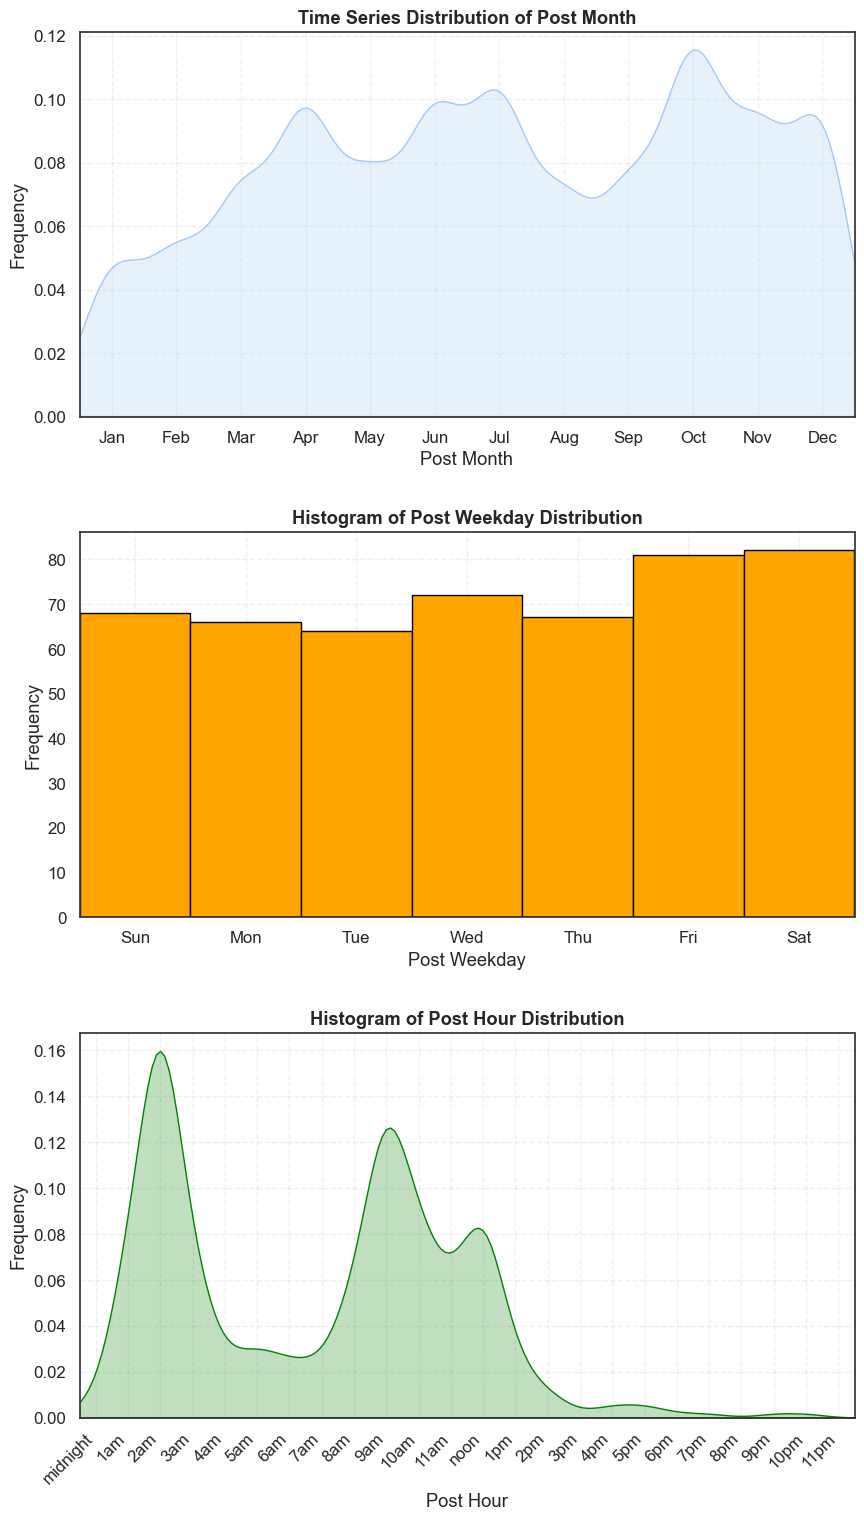

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))

# To plot a time series distribution for the Post Month
sns.kdeplot(data=df_raw, x='Post Month', bw_adjust=0.5, fill=True, ax=ax1)

# Plot formatting
ax1.set_title('Time Series Distribution of Post Month')
ax1.set_xlabel('Post Month')
ax1.set_ylabel('Frequency')
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May',
                    'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax1.set_xlim(0.5, 12.5)

# To plot a histogram for the distribution of Post Weekday
counts, bin_edges = np.histogram(
    df_raw['Post Weekday'], bins=np.arange(1, 9) - 0.5)
ax2.bar(bin_edges[:-1] + 0.5, counts, width=1,
        edgecolor='black', color='orange')

# Plot formatting
ax2.set_title('Histogram of Post Weekday Distribution')
ax2.set_xlabel('Post Weekday')
ax2.set_ylabel('Frequency')
ax2.set_xticks(range(1, 8))
ax2.set_xticklabels(['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
ax2.set_xlim(0.5, 7.5)

# To plot a histogram for the distribution of Post Hour
sns.kdeplot(data=df_raw, x='Post Hour', bw_adjust=0.5,
            fill=True, color='green', ax=ax3)
# Plot formatting
ax3.set_title('Histogram of Post Hour Distribution')
ax3.set_xlabel('Post Hour')
ax3.set_ylabel('Frequency')
ax3.set_xticks(range(1, 25))
ax3.set_xticklabels(['midnight', '1am', '2am', '3am', '4am', '5am', '6am', '7am', '8am', '9am', '10am', '11am',
                    'noon', '1pm', '2pm', '3pm', '4pm', '5pm', '6pm', '7pm', '8pm', '9pm', '10pm', '11pm'], rotation=45, ha='right')
ax3.set_xlim(0.5, 24.5)

fig.subplots_adjust(hspace=.3)
plt.show()

## Distributions of Likes and Shares

I created these as simple histogram visualizations, but wanted to practice creating horizontally aligned subplots sharing the same scale of y values (or 'ticks').

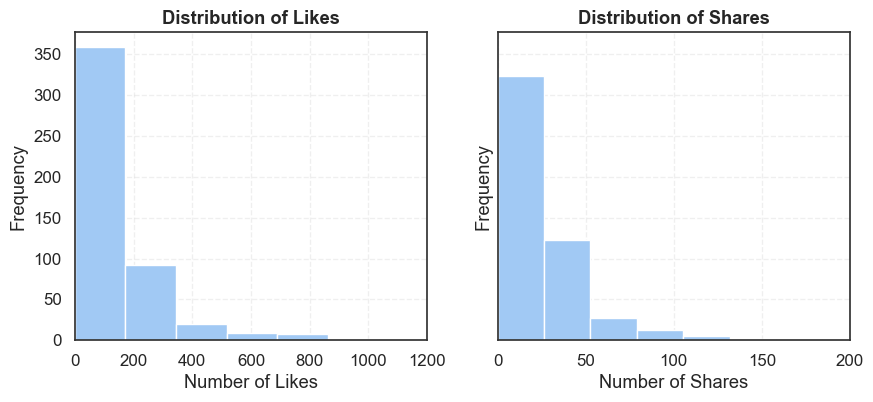

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(10, 4))
# To plot distribution of Likes
ax1.hist(df_raw['like'], bins=30)
# Plot formatting
ax1.set_title('Distribution of Likes')
ax1.set_xlabel('Number of Likes')
ax1.set_ylabel('Frequency')
ax1.set_xlim(0, 1200)

# To plot distribution of Shares
ax2.hist(df_raw['share'], bins=30)
# Plot formatting
ax2.set_title('Distribution of Shares')
ax2.set_xlabel('Number of Shares')
ax2.set_ylabel('Frequency')
ax2.set_xlim(0, 200)

plt.show()

## Total Interactions by Type Over Months

For this visualization, I used Plotly to create an interactive chart. You see the types of posts broken into 4 vertical bars, one for each type. By using the month slider, you can compare month to month the change for each. You can also hit the play button to allow it to automatically animate from month the month, showing the bars grow and shrink in height.

In [22]:
# Map numeric month to month name
df['Month Name'] = df['Post Month'].apply(
    lambda x: calendar.month_abbr[int(x)])

# List of month names in order
month_order = [calendar.month_abbr[i] for i in range(1, 13)]

# Set categorical type
df['Month Name'] = pd.Categorical(
    df['Month Name'], categories=month_order, ordered=True)

all_types = ['Photo', 'Status', 'Link', 'Video']

# Create a DataFrame with all combinations
all_combinations = pd.MultiIndex.from_product(
    [month_order, all_types], names=['Month Name', 'Type']
).to_frame(index=False)

# Group your original data to get total interactions per month/type
grouped = df.groupby(['Month Name', 'Type'], as_index=False, observed=True)[
    'Total Interactions'].sum()

# Merge to ensure all combinations are present
full_data = all_combinations.merge(
    grouped, on=['Month Name', 'Type'], how='left'
)

# Fill missing values with zero
full_data['Total Interactions'] = full_data['Total Interactions'].fillna(0)

fig = px.bar(
    full_data,
    x='Type',
    y='Total Interactions',
    color='Type',
    animation_frame='Month Name',
    category_orders={'Month Name': month_order},
    range_y=[0, df['Total Interactions'].max()],
    title='Interactions by Type Over Months'
)
fig.show()

## Additional Analysis: Multiple Linear Regression

### Data Preparation: Normalization

Below, I created a version of the data that is normalized that I will use to examine correlations between the features and then train and test the linear regression model. 

The target I am trying to predict is the number of likes, so I did not want to normalize those values. I separated this as "labels." I only normalized the "features" and then converted the normalized data to a DataFrame called "df_normalized."

In [23]:
# To separate features and labels
features = df_encoded.drop(columns=["like"])
labels = df_encoded["like"]

# To normalize the feature data
scaler = StandardScaler()
scaler.fit(features)
scaled_features = scaler.transform(features)

# To create a DataFrame for the normalized features
df_normalized = pd.DataFrame(scaled_features, columns=features.columns)

### Visualization: Feature Correlation Matrix

Below I generated a heatmap to visualize the pairwise correlations among the features. This will be useful in feature selection before performing the linear regression, helping to determine features I might drop and reduce the complexity of the model. 

For example, I can see in the correlation matrix that there are two similar sets of features that correlate strongly (Lifetime Post Reach, Lifetime Post Impressions, and Lifetime Engaged Users and those three features but by people who have liked the page), so I will likely drop the three that measure the features by people who have liked the page.

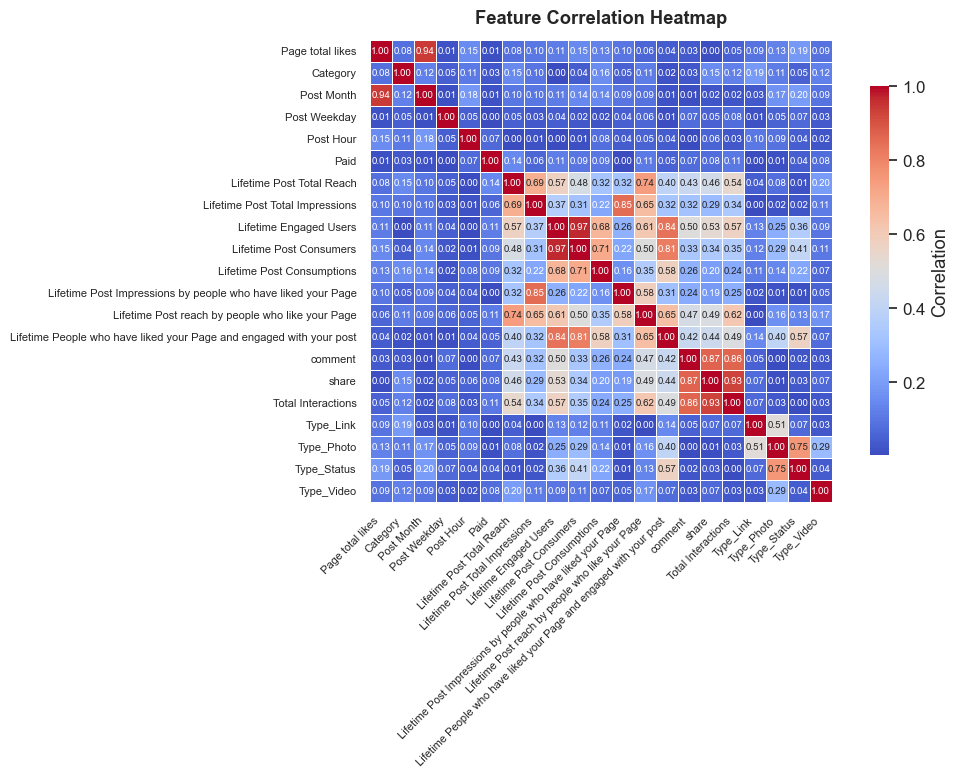

In [24]:
# To compute absolute correlation matrix
corr = abs(df_normalized.corr())

# To create the plot of the correlation matrix
plt.figure()
sns.heatmap(
    corr,
    annot=True,            # show correlation values
    fmt=".2f",             # 2 decimal places
    cmap="coolwarm",
    square=True,
    linewidths=0.5,        # fine grid lines
    cbar_kws={"shrink": 0.8, "label": "Correlation"},
    annot_kws={"size": 7}  # font size for annotations
)

# Plot formatting
plt.title("Feature Correlation Heatmap", pad=12)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=8)

plt.show()

### Feature Selection: Drop Highly Correlated Features

From the correlation matrix above, I can see that the following features have high correlation:
- Lifetime Post Impressions by people who have liked your Page
- Lifetime Post reach by people who like your Page
- Lifetime People who have liked your Page and engaged with your post
- Lifetime Post Consumers
- Lifetime Post Total Reach
- Lifetime Engaged Users
- share
- comment
- Post Month
- Type_Photo

Below, I dropped these highly correlated columns and generated another correlation matrix to verify that they have been dropped.

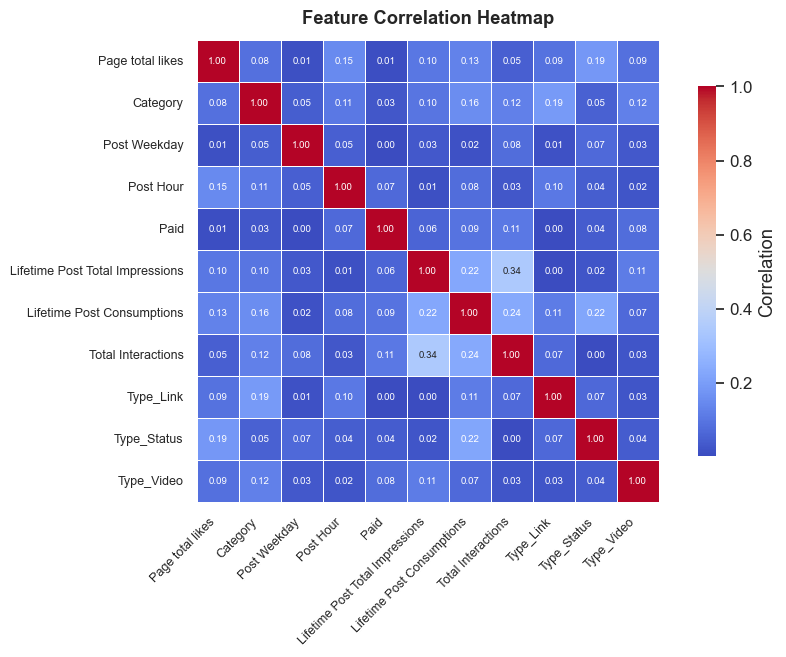

In [25]:
# To define the columns to drop
columns_to_drop = [
    'Lifetime Post Impressions by people who have liked your Page',
    'Lifetime Post reach by people who like your Page',
    'Lifetime People who have liked your Page and engaged with your post',
    'Lifetime Post Consumers',
    'Lifetime Post Total Reach',
    'Lifetime Engaged Users',
    'share',
    'comment',
    'Post Month',
    'Type_Photo'
]

# To remove the columns
df_dropped = df_normalized.drop(
    columns=columns_to_drop, axis=1, errors='ignore')

# To compute absolute correlation matrix again
corr = abs(df_dropped.corr())

# To create the plot of the revised correlation matrix
plt.figure()
sns.heatmap(
    corr,
    annot=True,            # show correlation values
    fmt=".2f",             # 2 decimal places
    cmap="coolwarm",
    square=True,
    linewidths=0.5,        # fine grid lines
    cbar_kws={"shrink": 0.8, "label": "Correlation"},
    annot_kws={"size": 7}  # font size for annotations
)

# Plot formatting
plt.title("Feature Correlation Heatmap", pad=12)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)

plt.show()

### Splitting the Data, Training the Model, and Making Predictions

I split the dataset using a 70% training / 30% testing split. I fit a Linear Regression model on the training data, printing the final coefficients and intercept. Then I used the model to make predictions on the training set and the test set.

In [26]:
# To split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    df_dropped, labels, test_size=0.3)

# To create and train the linear regression model
Model_Linear = LinearRegression()
Model_Linear.fit(X_train, Y_train)

# To output the model coefficients and intercept
print(Model_Linear.coef_)
print(Model_Linear.intercept_)

# To make predictions on the training and testing sets
Train_predictions = Model_Linear.predict(X_train)
Test_predictions = Model_Linear.predict(X_test)

[ 4.29483068e+00  1.15615178e+00 -6.95596518e-01  4.76984850e-01
  2.04896310e-01  1.68274703e+00  8.96359656e-01  3.19489356e+02
  2.90707724e-01 -2.68836482e+00 -2.24985109e+00]
178.86274135944646


### Evaluating the Model: Measures

To determine the accuracy of the model, I calculated R squared, Mean Absolute Error, and Root Mean Square Error.


In [67]:
# To calculate the R^2 (Coefficient of Determination)
Train_r2 = Model_Linear.score(X_train, Y_train)
Test_r2 = Model_Linear.score(X_test, Y_test)
print(f"Train R^2: {Train_r2}")
print(f"Test R^2: {Test_r2}\n")

# To calculate the Mean Absolute Error (MAE)
Train_mae = np.mean(np.abs(Y_train - Train_predictions))
Test_mae = np.mean(np.abs(Y_test - Test_predictions))
print(f"Train MAE: {Train_mae}")
print(f"Test MAE: {Test_mae}\n")

# To calculate the Root Mean Squared Error (RMSE)
Train_mse = mean_squared_error(Y_train, Train_predictions)
Test_mse = mean_squared_error(Y_test, Test_predictions)
Train_rmse = np.sqrt(Train_mse)
Test_rmse = np.sqrt(Test_mse)
print(f"Train RMSE: {Train_rmse}")
print(f"Test RMSE: {Test_rmse}")

Train R^2: 0.9960980996220772
Test R^2: 0.9924456111314262

Train MAE: 11.332595310938666
Test MAE: 9.753552218562588

Train RMSE: 22.39439005983549
Test RMSE: 19.505893449289157


### Evaluating the Model: Visualizations

Scatter plots comparing actual versus predicted values for both the training set and the testing set show are arranged linearly, fairly close to the perfect prediciton line.

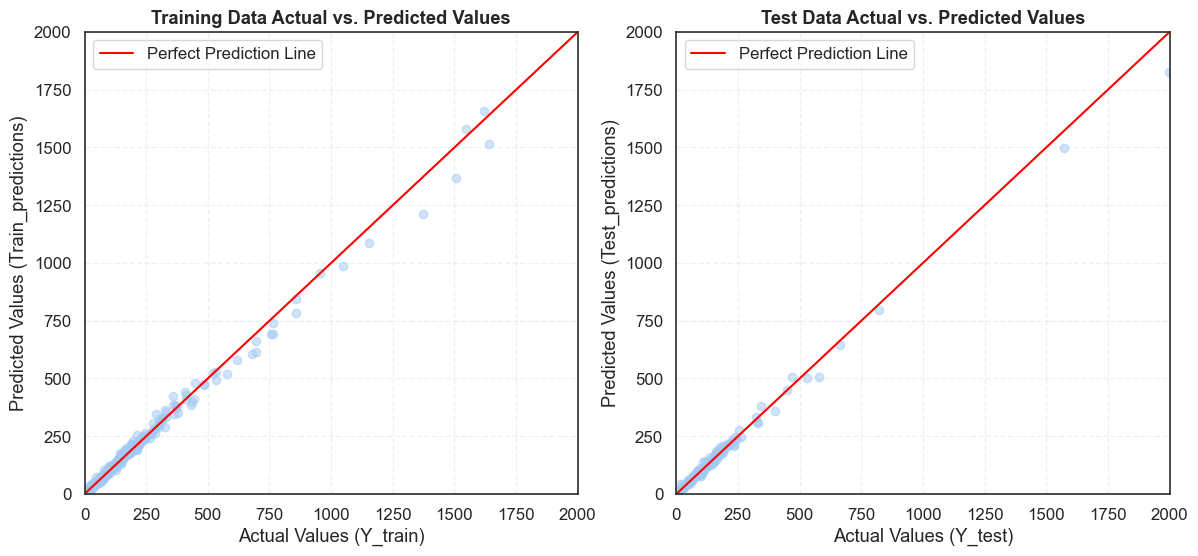

In [29]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# To plot training data actual vs predicted values
ax1.scatter(Y_train, Train_predictions, alpha=0.5)
ax1.plot([0, 2000], [0, 2000], 'r-', label='Perfect Prediction Line')

# Plot formatting
ax1.set_xlim(0, 2000)
ax1.set_ylim(0, 2000)
ax1.set_xlabel('Actual Values (Y_train)')
ax1.set_ylabel('Predicted Values (Train_predictions)')
ax1.set_title('Training Data Actual vs. Predicted Values')
ax1.legend()

# To plot testing data actual vs predicted values
ax2.scatter(Y_test, Test_predictions, alpha=0.5)
ax2.plot([0, 2000], [0, 2000], 'r-', label='Perfect Prediction Line')

# Plot formatting
ax2.set_xlim(0, 2000)
ax2.set_ylim(0, 2000)
ax2.set_xlabel('Actual Values (Y_test)')
ax2.set_ylabel('Predicted Values (Test_predictions)')
ax2.set_title('Test Data Actual vs. Predicted Values')
ax2.legend()

plt.show()

Scatter plots of the residuals versus the predicted values for both the train and test set show that the errors are scattered along the zero line, and not in a recognizable pattern. The points are generally clustered as values between 0-200 on the y axis and 0-20 on the x axis. However, I believe this is mainly due to the outliers in the higher range.

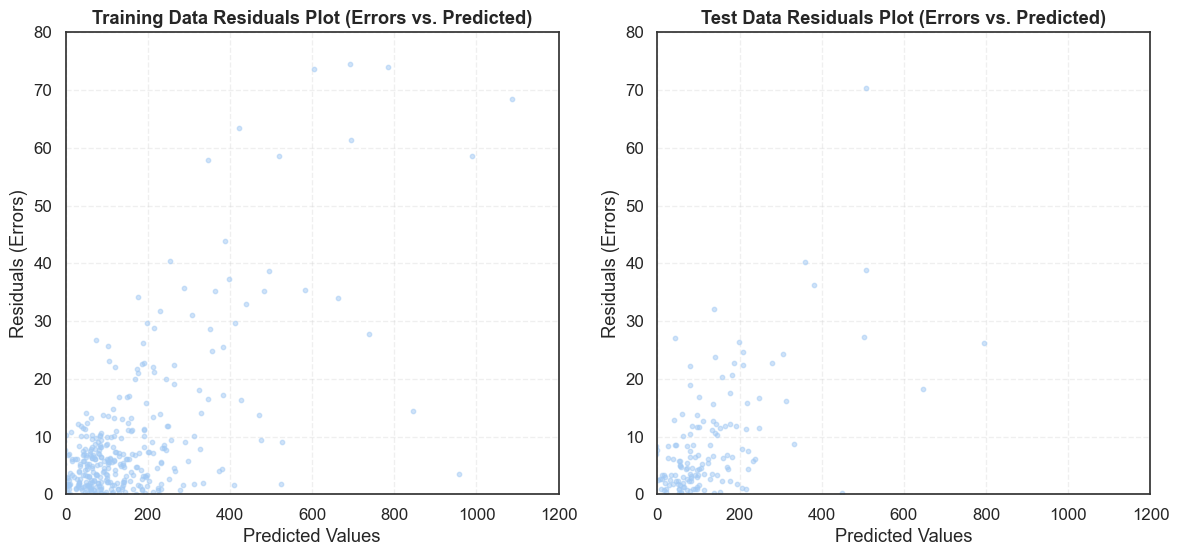

In [30]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# To calculate residuals
Train_residuals = np.abs(Y_train - Train_predictions)
Test_residuals = np.abs(Y_test - Test_predictions)

# To plot Training Data residuals
ax1.scatter(Train_predictions,
            Train_residuals, alpha=0.5, s=10)

# Plot formatting
ax1.set_xlim(0, 1200)
ax1.set_ylim(0, 80)
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Residuals (Errors)')
ax1.set_title(
    'Training Data Residuals Plot (Errors vs. Predicted)')

# To plot Test Data residuals
ax2.scatter(Test_predictions,
            Test_residuals, alpha=0.5, s=10)

# Plot formatting
ax2.set_xlim(0, 1200)
ax2.set_ylim(0, 80)
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Residuals (Errors)')
ax2.set_title(
    'Test Data Residuals Plot (Errors vs. Predicted)')

plt.show()

And, lastly, I plotted the distribution of residuals for both the training and test sets. The highest frequency of errors falls near 0, with a standard distribution to the right of it. Since the number of likes is never a negative number, we wouldn't see any values below zero. The distribution is, I believe, referred to as a "folded-normal" distribution.

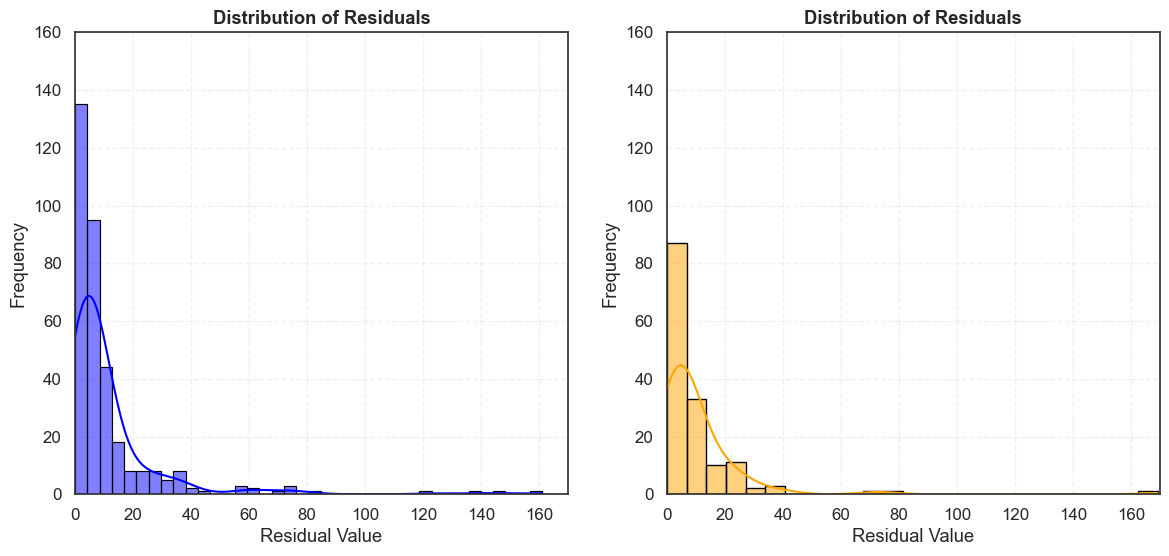

In [31]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# To plot Training Data residuals distribution
sns.histplot(Train_residuals, kde=True, color='blue', ax=ax1,
             label='Training Data Residuals', edgecolor='black')

# Plot formatting
ax1.set_xlim(0, 170)
ax1.set_ylim(0, 160)
ax1.set_title('Distribution of Residuals')
ax1.set_xlabel('Residual Value')
ax1.set_ylabel('Frequency')

# To plot Test Data residuals distribution
sns.histplot(Test_residuals, kde=True, color='orange', ax=ax2,
             label='Test Data Residuals', edgecolor='black')

# Plot formatting
ax2.set_xlim(0, 170)
ax2.set_ylim(0, 160)
ax2.set_title('Distribution of Residuals')
ax2.set_xlabel('Residual Value')
ax2.set_ylabel('Frequency')

plt.show()

## Conclusions

Returning to my research questions:

- Do the number of likes of a post and the number of shares of a post follow a standard distribution?
They do not, as neither shows the distinctive bell-shaped curve in the historgram that I plotted for them. Instead they follow what I think is called a "folded normal" distribution, meaning the peak is to the far left and the frequency incresingly falls off to the right.

- In which month, day of the week, and hour of the day are the most (and the fewest) posts made?
From the "time series" distributions I plotted for these, I can see that the most posts are made in October, on Saturdays, and at 2am. The least posts are made in January, on Tuesdays, and at 11pm.

- Is there a linear correlation between the the lifetime total reach of a post and its number of likes?
I calculated a Pearson coefficient to determine if there is a correlation between these two variables. With r=-0.08, a negative, though very weak relationship is indicated. 

- Might a simple linear regression model predict the number of likes of a post based on that post's lifetime total reach.
Despite the weak correlation indicated by the Pearson coefficient, I visualized the two variables using a scatter plot showing the regression line. This just reiterated that there wasn't a strong enough linear correlation to make predictions.

- Might a multiple linear regression model be effective in predicting the Total Interactions of a post?
I modified this to do a linear regression with multiple features to predict the number of likes. 

R squared was over .99% for both the training and test predictions, indicating that over 99% of the variance in the target value could be predicted by the model.

While not overly large, the MAE of 11.33 and the RMSE of 22.39 on the training set indicate there is a difference between the predicted and actual values of an average 11-22 likes. The higher number resulting from the greater penalty caused by larger errors in the calculation of RMSE.

Both MAE and RMSE improved on the testing data.

## Appendix and References

### Dataset Citation

Citation Request:

This dataset is public available for research. The details are described in (Moro et al., 2016).

Please include this citation if you plan to use this database: 

(Moro et al., 2016) S. Moro, P. Rita and B. Vala. "Predicting social media performance metrics and evaluation of the impact on brand building: A data mining approach." *Journal of Business Research*, Elsevier, In press.

Available at: http://dx.doi.org/10.1016/j.jbusres.2016.02.010


1. Title: Facebook performance metrics

2. Sources
   Created by: Sérgio Moro, Paulo Rita and Bernardo Vala (ISCTE-IUL) @ 2016
   
3. Past Usage:

   The full dataset was described and analyzed in:

   S. Moro, P. Rita and B. Vala. "Predicting social media performance metrics and evaluation of the impact on brand building: A data mining approach." *Journal of Business Research*, Elsevier, In press, Available online since 28 February 2016.

4. Relevant Information:

   The data is related to posts' published during the year of 2014 on the Facebook's page of a renowned cosmetics brand. This dataset contains 500 of the 790 rows and part of the features analyzed by Moro et al. (2016). The remaining were omitted due to confidentiality issues.

5. Number of Instances: 500

6. Number of Attributes: 19

7. Attribute information:

   It includes 7 features known prior to post publication and 12 features for evaluating post impact (see Tables 2 and 3 from Moro et al., 2016 - complete reference in the "Citation Request")

8. Missing Attribute Values: None


